<a href="https://colab.research.google.com/github/madonnaojorin/MAT494/blob/main/2.4_Maximum_Likelihood_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##2.4.1 MLE for Random Samples

####Definition 2.4.1
Let $X_1,X_2,\cdots,X_n$ have joint pmf or pdf $$f (x_1, x_2,\cdots, x_n;\theta_1,\cdots,\theta_m)\hspace{5mm} (*)$$ 
where the parameters $\theta_1,\cdots,\theta_m$ have unknown values. When $_1,\cdots, x_n$ are the observed sample values and (*) is regarded as a function of $\theta_1,\cdots,\theta_m$, it is called the likelihood function. The maximum likelihood estimates (mle’s)  $\hat{\theta_1},\cdots,\hat{\theta_m}$ are those values of the $\theta_i$’s that maximize the likelihood function,
so that 
$$f(x_1, x_2,\cdots, x_n;\theta_1,\cdots,\theta_m)\geq f(x_1, x_2,\cdots, x_n;\theta_1,\cdots,\theta_m)\text{ for all } \theta_1\cdots\theta_m $$


In [4]:
np.random.seed(123)
#
N = 100
beta_0 = 3
beta_1 = 8
#
X = np.random.normal(loc = 10, scale = 2, size = N)
e = np.random.normal(loc = 0, scale = 2, size = len(X))
Y = beta_0 + beta_1 * X + e

In [5]:
def log_lik(par_vec, y, x):
    # If the standard deviation prameter is negative, return a large value:
    if par_vec[2] < 0:
        return(1e8)
    # The likelihood function values:
    lik = norm.pdf(y, 
                   loc = par_vec[0] + par_vec[1] * x, 
                   scale = par_vec[2])
    #This is similar to calculating the likelihood for Y - XB
    # res = y - par_vec[0] - par_vec[1] * x
    # lik = norm.pdf(res, loc = 0, sd = par_vec[2])
    
    # If all logarithms are zero, return a large value
    if all(v == 0 for v in lik):
        return(1e8)
    # Logarithm of zero = -Inf
    return(-sum(np.log(lik[np.nonzero(lik)])))

In [6]:
import scipy.optimize as optimize
#
opt_res = optimize.minimize(fun = log_lik, 
                            x0 = [0, 0, 10], 
                            args = (Y, X))
print(opt_res)

      fun: 208.14955038268351
 hess_inv: array([[ 8.19750021e-01, -7.75496495e-02,  1.90897011e-03],
       [-7.75496495e-02,  7.69494834e-03, -1.67704984e-04],
       [ 1.90897011e-03, -1.67704984e-04,  1.82465650e-02]])
      jac: array([ 1.90734863e-06, -1.90734863e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 160
      nit: 20
     njev: 32
   status: 0
  success: True
        x: array([3.12775391, 7.98340745, 1.93974582])


In [7]:
print(opt_res.x)

[3.12775391 7.98340745 1.93974582]


In [8]:
print(np.sqrt(np.diag(opt_res.hess_inv)))

[0.90540048 0.08772085 0.13507985]


In [9]:
import statsmodels.api as sm

print(sm.OLS(Y, sm.add_constant(X)).fit().params)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[3.12775395 7.98340745]


In [10]:
print(np.sqrt(sum(sm.OLS(Y, sm.add_constant(X)).fit().resid**2) / (N - 2)))

1.9594392282714


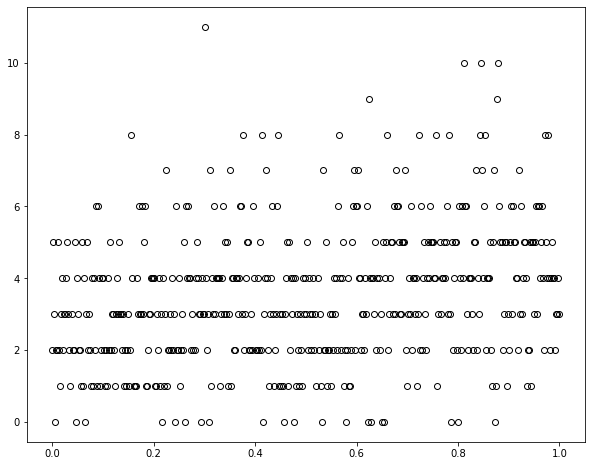

In [11]:
np.random.seed(123)
#
N = 500
beta_0 = 1
beta_1 = 0.5
#
x = np.linspace(start = 0, stop = 1, num = N)
mu = np.exp(beta_0 + beta_1 * x)
y = np.random.poisson(lam = mu, size = N)

plt.figure(num = 5, figsize = (10, 8))
plt.plot(x, y, linestyle = "None", marker = "o",
         markerfacecolor = "None", color = "black")
plt.show()

In [12]:
from scipy.stats import poisson
#
def log_lik(par_vec, y, x):
    # The likelihood function values:
    lik = poisson.pmf(y, mu = np.exp(par_vec[0] + par_vec[1] * x))
    # If all logarithms are zero, return a large value
    if all(v == 0 for v in lik):
        return(1e8)
    # Logarithm of zero = -Inf
    return(-sum(np.log(lik[np.nonzero(lik)])))

In [13]:
opt_res = optimize.minimize(fun = log_lik, 
                            x0 = [0, 0], 
                            args = (y, x))
print(opt_res)

      fun: 1005.4483712482811
 hess_inv: array([[ 0.00027369, -0.00022952],
       [-0.00022952,  0.00066358]])
      jac: array([7.62939453e-06, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 48
      nit: 9
     njev: 12
   status: 0
  success: True
        x: array([0.97663589, 0.5257492 ])


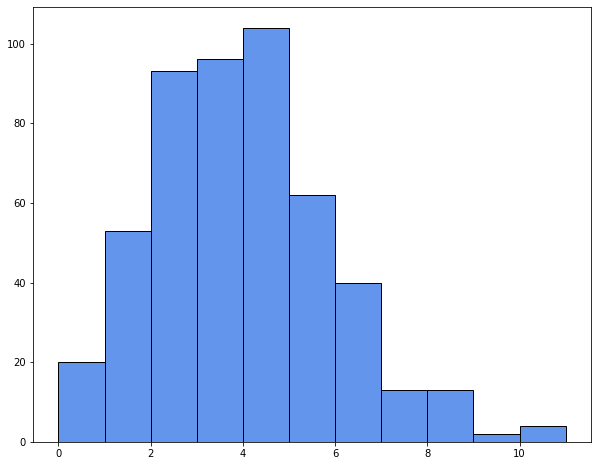

In [14]:
plt.figure(num = 6, figsize = (10, 8))
plt.hist(y, bins = 11, histtype = 'bar', color = "cornflowerblue", ec = 'black')
plt.show()

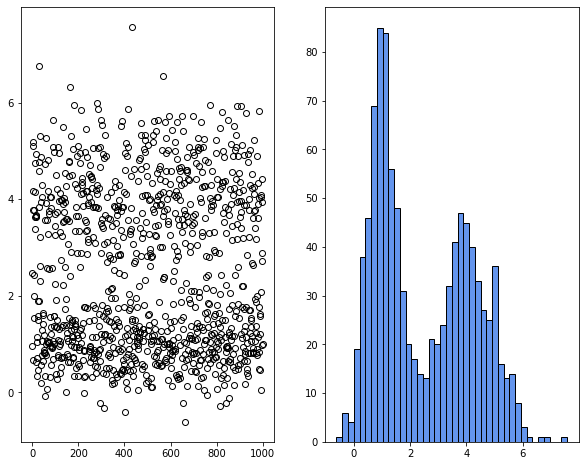

In [15]:
np.random.seed(123)
#
N = 500
x1 = np.random.normal(loc = 1, scale = 0.5, size = N)
x2 = np.random.normal(loc = 4, scale = 1, size = N)
# randomize the ordering of x1 and x2 variables
y = np.concatenate((x1, x2))
np.random.shuffle(y)
# plot the data
fig = plt.figure(num = 7, figsize = (10, 8))
fig.add_subplot('121').plot(y, color = "black", 
        linestyle = "None", marker = "o", markerfacecolor = 'None')
fig.add_subplot('122').hist(y, bins = 40, 
                            color = "cornflowerblue", ec = 'black')
plt.show()

##2.4.2 Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#
np.random.seed(123)
#
N = 200
beta_0 = 1
beta_1 = 0.5
e_sd = 0.5
#
x = np.linspace(start = -10, stop = 10, num = N)
e = np.random.normal(loc = 0, scale = e_sd, size = len(x))
y = beta_0 + beta_1 * x + e
y_cond_exp = beta_0 + beta_1 * x
# Fit the data
#y_mdl = sm.OLS(y, sm.add_constant(x)).fit()
# Plot the density at specified X axis points:
plot_at = [-5, 0, 5]

In [2]:
from scipy.stats import norm
#
def sideways_dnorm(where_x, where_y, e_var, magnify = 4):
    values = np.arange(start = -2, stop = 2.1, step = 0.1) # calculate density for this interval
    # Y|X ~ Normal(XB, sigma^2)
    # (Y - XB)|X ~ Normal(0, sigma^2)
    dens = norm.pdf(x = values, loc = 0, scale = np.sqrt(e_var))
    x = where_x + dens * np.array(magnify)
    y = where_y + values
    return(np.vstack((x, y)))

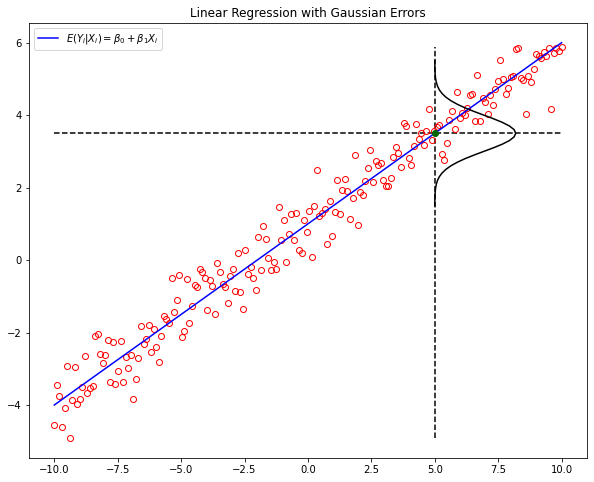

In [3]:
plt.figure(num = 4, figsize = (10, 8))
plt.plot(x, y, linestyle = "None", marker = "o", 
         color = "red", markerfacecolor = 'None')
plt.title("Linear Regression with Gaussian Errors")         
#plt.plot(x, y_mdl.fittedvalues, linestyle = "-", color = "blue")
plt.plot(x, y_cond_exp, linestyle = "-", color = "blue", 
        label = "$E(Y_i|X_i) = \\beta_0 + \\beta_1 X_i$")
for i in range(0, len(plot_at)):
    # y_fit = y_mdl.params[0] + y_mdl.params[1] * plot_at[i]
    y_fit = beta_0 + beta_1 * plot_at[i]
    xy = sideways_dnorm(where_x = plot_at[i],
                       where_y = y_fit,
                       e_var = e_sd**2,#np.var(y_mdl.resid),
                       magnify = 4)
plt.plot(xy[0], xy[1], linestyle = "-", color = "black")
plt.hlines(y = y_fit, linestyle = "--", 
               color = "black", xmin = min(x), xmax = max(x))
plt.vlines(x = plot_at[i], linestyle = "--", 
                color = "black", ymin = min(y), ymax = max(y))
plt.plot(plot_at[i], y_fit, linestyle = "None", 
             marker = "o", color = "darkgreen")
plt.legend()
plt.show()